In [78]:
#Relevant Libraries Import 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os

#import shap
#%matplotlib inline
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier


In [79]:
#Dataset Import
df = pd.read_csv("/content/Dataset of Diabetes .csv") 

In [80]:
#data preprocessing Start

df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [81]:
df['CLASS'].value_counts()


Y     844
N     102
P      53
N       1
Name: CLASS, dtype: int64

Replace Simillar Values to Unique Values 

In [82]:
df['CLASS'] = df['CLASS'].str.replace("N ","N")
df['CLASS'] = df['CLASS'].str.replace("Y ","Y")
df['Gender'] = df['Gender'].str.replace("f","F")

In [83]:
#now check the unique value of gender
df['Gender'].unique()
#df['Gender'].value_counts()

array(['F', 'M'], dtype=object)

In [84]:
#now check the unique value of gender
df['CLASS'].unique()
df['CLASS'].value_counts()


Y    844
N    103
P     53
Name: CLASS, dtype: int64

information about dataset

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


Here we find class and Gender has object value so we need to convert them into Encoded label through label encoder

Heat map


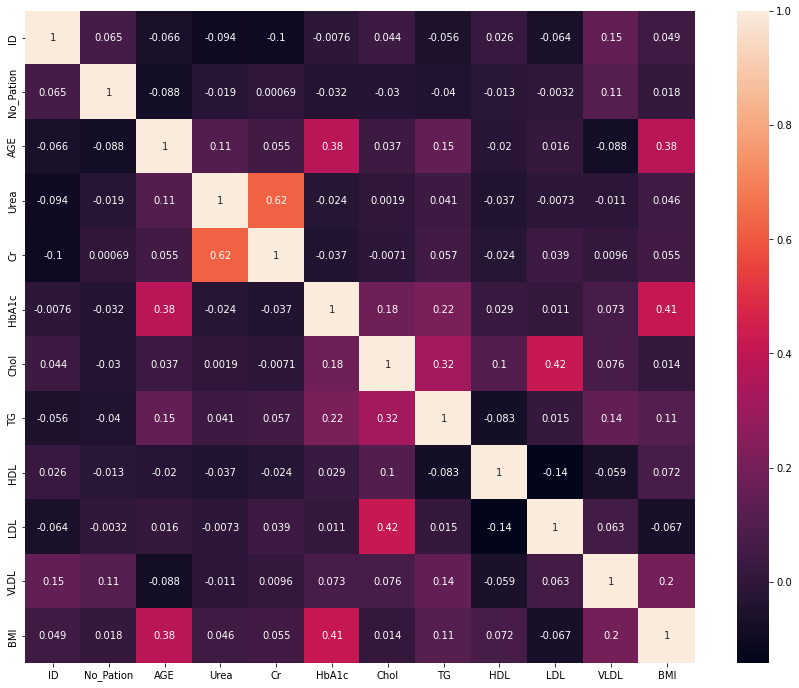

In [86]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

# **Label Encoder**

In [87]:
df.CLASS= le.fit_transform(df.CLASS.values)
df.Gender= le.fit_transform(df.Gender.values)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   int64  
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 109.5 KB


In [89]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


Removing duplicated data points
 if find any



In [90]:
print(f"There are {df.duplicated().sum()} duplicates data")
df.loc[df.duplicated(keep=False)].sort_values(by=df.columns.to_list())

There are 0 duplicates data


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS


finding is null value avilable 

In [91]:
df.isnull().sum()


ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

**Creating a test set**

In [92]:
original_train_df, test_df = train_test_split(df, test_size=0.2)

# To be sure we will create a copy for further processing
train_df = original_train_df.copy() 

Gaining further insight
**bold text**

In [93]:
df1=df

In [94]:
df1.head(5)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [95]:
from sklearn.preprocessing import StandardScaler

stan_scaler = StandardScaler()

temp2_df = df1
df_scaledstd = pd.DataFrame(stan_scaler.fit_transform(temp2_df),columns = df.columns)
# transform all attributes
#temp2_df[column_names] = stan_scaler.fit_transform(temp2_df[column_names])
#temp2_df.sort_index(inplace=True)
#temp2_df.head()


In [96]:
df_scaledstd.head(5)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0.672140,-0.074747,-1.139671,-0.401144,-0.144781,-0.382672,-1.334983,-0.509436,-1.035084,1.810756,-1.085457,-0.369958,-1.124622,-2.759951
1,1.641852,-0.069940,0.877446,-3.130017,-0.212954,-0.115804,-1.334983,-0.893730,-0.678063,-0.158692,-0.457398,-0.342649,-1.326239,-2.759951
2,0.330868,-0.065869,-1.139671,-0.401144,-0.144781,-0.382672,-1.334983,-0.509436,-1.035084,1.810756,-1.085457,-0.369958,-1.124622,-2.759951
3,1.412950,-0.054126,-1.139671,-0.401144,-0.144781,-0.382672,-1.334983,-0.509436,-1.035084,1.810756,-1.085457,-0.369958,-1.124622,-2.759951
4,0.680463,-0.069939,0.877446,-2.334096,0.673299,-0.382672,-1.334983,0.028576,-0.963680,-0.613180,-0.547121,-0.397267,-1.729472,-2.759951


**Rescaling or standardizing attributes**

In [97]:
pip install featurewiz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
from featurewiz import featurewiz


In [99]:
target = 'CLASS'
 
features= featurewiz(df, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (1000, 14)
#### Single_Label Multi_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
##############################################

In [100]:
print(features)


(['AGE', 'BMI', 'Chol', 'Cr', 'Gender', 'HDL', 'HbA1c', 'ID', 'LDL', 'No_Pation', 'TG', 'Urea', 'VLDL'],      AGE   BMI  Chol  Cr  Gender  HDL  HbA1c   ID  LDL  No_Pation   TG  Urea  \
0     50  24.0   4.2  46       0  2.4    4.9  502  1.4      17975  0.9   4.7   
1     26  23.0   3.7  62       1  1.1    4.9  735  2.1      34221  1.4   4.5   
2     50  24.0   4.2  46       0  2.4    4.9  420  1.4      47975  0.9   4.7   
3     50  24.0   4.2  46       0  2.4    4.9  680  1.4      87656  0.9   4.7   
4     33  21.0   4.9  46       1  0.8    4.9  504  2.0      34223  1.0   7.1   
..   ...   ...   ...  ..     ...  ...    ...  ...  ...        ...  ...   ...   
995   71  30.0   7.5  97       1  1.2    7.0  200  1.8     454317  1.7  11.0   
996   31  37.2   4.1  60       1  0.7   12.3  671  2.4     876534  2.2   3.0   
997   30  27.4   4.1  81       1  1.2    6.7  669  2.4      87654  1.1   7.1   
998   38  40.5   5.3  59       1  1.6    6.7   99  2.9      24004  2.0   5.8   
999   54  33.0 

In [101]:
featuresinit=['AGE', 'BMI', 'Chol', 'Cr', 'Gender', 'HDL', 'HbA1c', 'ID', 'LDL', 'No_Pation', 'TG', 'Urea', 'VLDL']

In [102]:
featuresnewfromfeaturewiz=['HbA1c', 'AGE', 'BMI', 'No_Pation', 'Cr', 'TG', 'VLDL']


In [103]:
#After Domain Expert Opinion, FeatureWIZ, FilterBased (Chi-Squared) and WrapperBased  Method = Selected Features. 
featuresfinal=['HbA1c', 'AGE', 'BMI', 'Chol', 'Cr', 'TG', 'VLDL', 'Urea','LDL','HDL']

In [104]:
features_for_lime=featuresfinal

In [105]:
#df.head(5)
df_scaledstd.head(5)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0.672140,-0.074747,-1.139671,-0.401144,-0.144781,-0.382672,-1.334983,-0.509436,-1.035084,1.810756,-1.085457,-0.369958,-1.124622,-2.759951
1,1.641852,-0.069940,0.877446,-3.130017,-0.212954,-0.115804,-1.334983,-0.893730,-0.678063,-0.158692,-0.457398,-0.342649,-1.326239,-2.759951
2,0.330868,-0.065869,-1.139671,-0.401144,-0.144781,-0.382672,-1.334983,-0.509436,-1.035084,1.810756,-1.085457,-0.369958,-1.124622,-2.759951
3,1.412950,-0.054126,-1.139671,-0.401144,-0.144781,-0.382672,-1.334983,-0.509436,-1.035084,1.810756,-1.085457,-0.369958,-1.124622,-2.759951
4,0.680463,-0.069939,0.877446,-2.334096,0.673299,-0.382672,-1.334983,0.028576,-0.963680,-0.613180,-0.547121,-0.397267,-1.729472,-2.759951


In [106]:
#df_new=df_scaledstd.drop('ID', axis=1)
df_new=df_scaledstd.drop(columns=['ID', 'Gender', 'No_Pation'])


In [107]:
df_new.head(5)

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,-0.401144,-0.144781,-0.382672,-1.334983,-0.509436,-1.035084,1.810756,-1.085457,-0.369958,-1.124622,-2.759951
1,-3.130017,-0.212954,-0.115804,-1.334983,-0.893730,-0.678063,-0.158692,-0.457398,-0.342649,-1.326239,-2.759951
2,-0.401144,-0.144781,-0.382672,-1.334983,-0.509436,-1.035084,1.810756,-1.085457,-0.369958,-1.124622,-2.759951
3,-0.401144,-0.144781,-0.382672,-1.334983,-0.509436,-1.035084,1.810756,-1.085457,-0.369958,-1.124622,-2.759951
4,-2.334096,0.673299,-0.382672,-1.334983,0.028576,-0.963680,-0.613180,-0.547121,-0.397267,-1.729472,-2.759951


In [108]:
dfnew=df_new
#dfnew.info()
df['CLASS'].unique()

array([0, 1, 2])

In [109]:
X = dfnew.drop( 'CLASS', axis=1)
y = df['CLASS']


In [110]:
X.shape



(1000, 10)

In [111]:
y.shape

(1000,)

In [112]:
#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state = 0, stratify = y)

In [113]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import classification_report
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (800, 10)
Number transactions y_train dataset:  (800,)
Number transactions X_test dataset:  (200, 10)
Number transactions y_test dataset:  (200,)


In [114]:
# logistic regression object
lr = LogisticRegression()
  
# train the model on train set
lr.fit(X_train, y_train.ravel())
  
predictions = lr.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))


#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        21
           1       0.25      0.10      0.14        10
           2       0.96      0.98      0.97       169

    accuracy                           0.92       200
   macro avg       0.65      0.64      0.64       200
weighted avg       0.90      0.92      0.91       200

mse= 0.14
msle= 0.04190437295046746
mae= 0.1
rmse= 0.37416573867739417


In [115]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train.ravel())
predictions = DT.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       1.00      0.90      0.95        10
           2       0.99      0.99      0.99       169

    accuracy                           0.98       200
   macro avg       0.98      0.95      0.96       200
weighted avg       0.99      0.98      0.98       200

mse= 0.045
msle= 0.012891499377591643
mae= 0.025
rmse= 0.21213203435596426


In [116]:
# support vector machine object
svm = SVC(kernel='linear')
  
# train the model on train set
svm.fit(X_train, y_train.ravel())
  
predictions = svm.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        21
           1       0.75      0.30      0.43        10
           2       0.95      0.98      0.97       169

    accuracy                           0.93       200
   macro avg       0.83      0.70      0.73       200
weighted avg       0.92      0.93      0.92       200

mse= 0.16
msle= 0.0475253128804796
mae= 0.1
rmse= 0.4


In [117]:
# support vector machine object rbf
svm = SVC(kernel='rbf')
  
# train the model on train set
svm.fit(X_train, y_train.ravel())
  
predictions = svm.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        21
           1       0.67      0.20      0.31        10
           2       0.94      0.99      0.97       169

    accuracy                           0.92       200
   macro avg       0.79      0.63      0.67       200
weighted avg       0.91      0.92      0.91       200

mse= 0.185
msle= 0.055962322754133514
mae= 0.115
rmse= 0.4301162633521313


In [118]:
# KNN classifier machine object
KNN =  KNeighborsClassifier()
  
# train the model on train set
KNN.fit(X_train, y_train.ravel())
  
predictions = KNN.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68        21
           1       0.33      0.30      0.32        10
           2       0.95      0.96      0.96       169

    accuracy                           0.90       200
   macro avg       0.66      0.64      0.65       200
weighted avg       0.90      0.90      0.90       200

mse= 0.205
msle= 0.06241087243224719
mae= 0.135
rmse= 0.4527692569068708


In [119]:
# GNB classifier machine object
GNB =  GaussianNB()
  
# train the model on train set
GNB.fit(X_train, y_train.ravel())
  
predictions = GNB.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.60      0.86      0.71        21
           1       0.55      0.60      0.57        10
           2       0.97      0.92      0.95       169

    accuracy                           0.90       200
   macro avg       0.71      0.79      0.74       200
weighted avg       0.91      0.90      0.90       200

mse= 0.285
msle= 0.08455579147432289
mae= 0.165
rmse= 0.5338539126015656


In [120]:
# XGB classifier machine object
XGB = XGBClassifier()
  
# train the model on train set
XGB.fit(X_train, y_train.ravel())
  
predictions = XGB.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.90      0.95        10
           2       0.99      0.99      0.99       169

    accuracy                           0.99       200
   macro avg       0.98      0.96      0.97       200
weighted avg       0.99      0.99      0.99       200

mse= 0.025
msle= 0.0068567545735287345
mae= 0.015
rmse= 0.15811388300841897


In [121]:
# MLP classifier machine object
MLP = MLPClassifier(random_state=1, max_iter=300)
# train the model on train set
MLP.fit(X_train, y_train.ravel())
  
predictions = MLP.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        21
           1       0.67      0.40      0.50        10
           2       0.97      0.98      0.97       169

    accuracy                           0.94       200
   macro avg       0.82      0.75      0.77       200
weighted avg       0.93      0.94      0.94       200

mse= 0.12
msle= 0.03545582327235379
mae= 0.08
rmse= 0.34641016151377546


In [122]:
# adaboost classifier machine object
adaboost =AdaBoostClassifier(random_state=96)
# train the model on train set
adaboost.fit(X_train, y_train.ravel())
  
predictions = adaboost.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       0.56      1.00      0.71        10
           2       1.00      0.95      0.97       169

    accuracy                           0.95       200
   macro avg       0.84      0.98      0.89       200
weighted avg       0.97      0.95      0.96       200

mse= 0.06
msle= 0.012610822959789521
mae= 0.05
rmse= 0.2449489742783178


In [123]:
# random Forest classifier machine object
RF =RandomForestClassifier(max_depth=2, random_state=0)
# train the model on train set
RF.fit(X_train, y_train.ravel())
  
predictions = RF.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        21
           1       0.00      0.00      0.00        10
           2       0.96      0.99      0.97       169

    accuracy                           0.94       200
   macro avg       0.59      0.66      0.62       200
weighted avg       0.90      0.94      0.92       200

mse= 0.09
msle= 0.025030353203159626
mae= 0.07
rmse= 0.3


In [124]:
print("Before OverSampling, counts of label '2': {} ".format(sum(y_train == 2)))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print('Before OverSampling, the shape of train_X: {}'.format(X.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y.shape))





Before OverSampling, counts of label '2': 675 
Before OverSampling, counts of label '1': 43
Before OverSampling, counts of label '0': 82 

Before OverSampling, the shape of train_X: (1000, 10)
Before OverSampling, the shape of train_y: (1000,) 



In [125]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [126]:
# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
sm_over = SMOTE(random_state = 2)

X_train_res, y_train_res = sm_over.fit_resample(X_train, y_train.ravel())

In [127]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (2025, 10)
After OverSampling, the shape of train_y: (2025,) 

After OverSampling, counts of label '2': 675
After OverSampling, counts of label '1': 675
After OverSampling, counts of label '0': 675


In [128]:
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())

In [129]:

lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78        21
           1       0.35      0.60      0.44        10
           2       0.99      0.92      0.95       169

    accuracy                           0.90       200
   macro avg       0.69      0.79      0.73       200
weighted avg       0.93      0.90      0.91       200

mse= 0.175
msle= 0.05040514706292784
mae= 0.125
rmse= 0.4183300132670378


In [130]:
#decision tree after 
DT1 = DecisionTreeClassifier()
DT1.fit(X_train_res, y_train_res.ravel())
predictions = DT1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.90      0.95        10
           2       0.99      0.99      0.99       169

    accuracy                           0.99       200
   macro avg       0.98      0.96      0.97       200
weighted avg       0.99      0.99      0.99       200

mse= 0.025
msle= 0.0068567545735287345
mae= 0.015
rmse= 0.15811388300841897


In [131]:
# support vector machine object
svm1 = SVC(kernel='linear')
  
# train the model on train set
svm1.fit(X_train_res, y_train_res.ravel())
  
predictions = svm1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.71      0.95      0.82        21
           1       0.53      0.80      0.64        10
           2       0.99      0.92      0.96       169

    accuracy                           0.92       200
   macro avg       0.75      0.89      0.80       200
weighted avg       0.94      0.92      0.93       200

mse= 0.185
msle= 0.05280181215388316
mae= 0.115
rmse= 0.4301162633521313


In [132]:
# support vector machine object
svm2 = SVC(kernel='rbf')
  
# train the model on train set
svm2.fit(X_train_res, y_train_res.ravel())
  
predictions = svm1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.71      0.95      0.82        21
           1       0.53      0.80      0.64        10
           2       0.99      0.92      0.96       169

    accuracy                           0.92       200
   macro avg       0.75      0.89      0.80       200
weighted avg       0.94      0.92      0.93       200

mse= 0.185
msle= 0.05280181215388316
mae= 0.115
rmse= 0.4301162633521313


In [133]:
# KNN classifier machine object
KNN1 =  KNeighborsClassifier()
  
# train the model on train set
KNN1.fit(X_train_res, y_train_res.ravel())
  
predictions = KNN1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73        21
           1       0.41      0.70      0.52        10
           2       0.99      0.93      0.96       169

    accuracy                           0.91       200
   macro avg       0.70      0.80      0.74       200
weighted avg       0.93      0.91      0.91       200

mse= 0.185
msle= 0.05637612762818428
mae= 0.125
rmse= 0.4301162633521313


In [134]:
# GNB classifier machine object
GNB1 =  GaussianNB()
  
# train the model on train set
GNB1.fit(X_train_res, y_train_res.ravel())
  
predictions = GNB1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.61      0.81      0.69        21
           1       0.64      0.70      0.67        10
           2       0.96      0.92      0.94       169

    accuracy                           0.90       200
   macro avg       0.74      0.81      0.77       200
weighted avg       0.91      0.90      0.90       200

mse= 0.315
msle= 0.09182075094326667
mae= 0.175
rmse= 0.5612486080160912


In [135]:
# XGB classifier machine object
XGB1 =XGBClassifier()
XGB1.fit(X_train_res, y_train_res.ravel())
predictions = XGB1.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.90      0.95        10
           2       0.99      0.99      0.99       169

    accuracy                           0.99       200
   macro avg       0.98      0.96      0.97       200
weighted avg       0.99      0.99      0.99       200

mse= 0.025
msle= 0.0068567545735287345
mae= 0.015
rmse= 0.15811388300841897


In [136]:
# MLP classifier machine object
MLP1 = MLPClassifier(random_state=1, max_iter=300)
# train the model on train set
MLP1.fit(X_train_res, y_train_res.ravel())
  
predictions = MLP1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.78      0.70      0.74        10
           2       0.98      0.99      0.99       169

    accuracy                           0.96       200
   macro avg       0.87      0.85      0.86       200
weighted avg       0.96      0.96      0.96       200

mse= 0.085
msle= 0.0269550491598934
mae= 0.055
rmse= 0.29154759474226505


In [137]:
# adaboost classifier machine object
adaboost1 =AdaBoostClassifier(random_state=96)
# train the model on train set
adaboost1.fit(X_train_res, y_train_res.ravel())
  
predictions = adaboost1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.73      0.90      0.81        21
           1       0.50      0.90      0.64        10
           2       0.98      0.91      0.94       169

    accuracy                           0.91       200
   macro avg       0.74      0.90      0.80       200
weighted avg       0.93      0.91      0.91       200

mse= 0.23
msle= 0.06253280093122443
mae= 0.14
rmse= 0.47958315233127197


In [138]:
# random Forest classifier machine object
RF1 =RandomForestClassifier(max_depth=2, random_state=0)
# train the model on train set
RF1.fit(X_train_res, y_train_res.ravel())
  
predictions = RF1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        21
           1       0.69      0.90      0.78        10
           2       0.99      0.93      0.96       169

    accuracy                           0.94       200
   macro avg       0.81      0.94      0.87       200
weighted avg       0.95      0.94      0.94       200

mse= 0.165
msle= 0.04635326247576949
mae= 0.095
rmse= 0.406201920231798


In [139]:
#NEAR MISS RESULT 
print('After UnderSampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_miss.shape))

print("After UnderSampling, counts of label '2': {}".format(sum(y_train_miss == 2)))
print("After UnderSampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

After UnderSampling, the shape of train_X: (129, 10)
After UnderSampling, the shape of train_y: (129,) 

After UnderSampling, counts of label '2': 43
After UnderSampling, counts of label '1': 43
After UnderSampling, counts of label '0': 43


In [140]:

lr1 = LogisticRegression()
lr1.fit(X_train_miss, y_train_miss.ravel())
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        21
           1       0.23      0.50      0.31        10
           2       0.99      0.91      0.95       169

    accuracy                           0.88       200
   macro avg       0.66      0.75      0.69       200
weighted avg       0.93      0.88      0.90       200

mse= 0.15
msle= 0.041215491637250266
mae= 0.13
rmse= 0.3872983346207417


In [141]:
#decision tree after 
DT1 = DecisionTreeClassifier()
DT1.fit(X_train_miss, y_train_miss.ravel())
predictions = DT1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       0.71      1.00      0.83        10
           2       1.00      0.97      0.98       169

    accuracy                           0.97       200
   macro avg       0.89      0.99      0.93       200
weighted avg       0.98      0.97      0.98       200

mse= 0.04
msle= 0.009322783881926216
mae= 0.03
rmse= 0.2


In [142]:
# support vector machine object
svm1 = SVC(kernel='linear')
  
# train the model on train set
svm1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = svm1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.68      0.90      0.78        21
           1       0.33      0.80      0.47        10
           2       1.00      0.88      0.93       169

    accuracy                           0.88       200
   macro avg       0.67      0.86      0.73       200
weighted avg       0.93      0.88      0.89       200

mse= 0.23
msle= 0.06336041067932595
mae= 0.16
rmse= 0.47958315233127197


In [143]:
# support vector machine object
svm1 = SVC(kernel='rbf')
  
# train the model on train set
svm1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = svm1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72        21
           1       0.12      0.80      0.21        10
           2       1.00      0.69      0.81       169

    accuracy                           0.69       200
   macro avg       0.63      0.72      0.58       200
weighted avg       0.93      0.69      0.77       200

mse= 0.34
msle= 0.07561237347720204
mae= 0.32
rmse= 0.5830951894845301


In [144]:
# KNN classifier machine object
KNN1 =  KNeighborsClassifier()
  
# train the model on train set
KNN1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = KNN1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.65      0.81      0.72        21
           1       0.21      0.40      0.28        10
           2       0.99      0.91      0.94       169

    accuracy                           0.87       200
   macro avg       0.62      0.70      0.65       200
weighted avg       0.91      0.87      0.89       200

mse= 0.205
msle= 0.060077971580098345
mae= 0.155
rmse= 0.4527692569068708


In [145]:
# GNB classifier machine object
GNB1 =  GaussianNB()
  
# train the model on train set
GNB1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = GNB1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.48      0.71      0.58        21
           1       0.47      0.90      0.62        10
           2       0.99      0.88      0.93       169

    accuracy                           0.86       200
   macro avg       0.65      0.83      0.71       200
weighted avg       0.91      0.86      0.88       200

mse= 0.395
msle= 0.11953404563381945
mae= 0.225
rmse= 0.6284902544988268


In [146]:
# XGB classifier machine object
XGB1 =XGBClassifier()
XGB1.fit(X_train_miss, y_train_miss.ravel())
predictions = XGB1.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       0.59      1.00      0.74        10
           2       1.00      0.95      0.98       169

    accuracy                           0.96       200
   macro avg       0.85      0.98      0.90       200
weighted avg       0.97      0.96      0.96       200

mse= 0.055
msle= 0.011788813190323695
mae= 0.045
rmse= 0.2345207879911715


In [147]:
# MLP classifier machine object
MLP1 = MLPClassifier(random_state=1, max_iter=300)
# train the model on train set
MLP1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = MLP1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74        21
           1       0.30      0.80      0.43        10
           2       0.99      0.89      0.94       169

    accuracy                           0.87       200
   macro avg       0.67      0.82      0.70       200
weighted avg       0.93      0.87      0.89       200

mse= 0.205
msle= 0.05691746097984798
mae= 0.155
rmse= 0.4527692569068708


In [148]:
# adaboost classifier machine object
adaboost1 =AdaBoostClassifier(random_state=96)
# train the model on train set
adaboost1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = adaboost1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84        21
           1       0.29      1.00      0.45        10
           2       0.97      0.85      0.91       169

    accuracy                           0.85       200
   macro avg       0.73      0.87      0.73       200
weighted avg       0.93      0.85      0.88       200

mse= 0.24
msle= 0.05593670329155729
mae= 0.18
rmse= 0.4898979485566356


In [149]:
# random Forest classifier machine object
RF1 =RandomForestClassifier(max_depth=2, random_state=0)
# train the model on train set
RF1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = RF1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        21
           1       0.67      1.00      0.80        10
           2       1.00      0.95      0.97       169

    accuracy                           0.95       200
   macro avg       0.84      0.98      0.90       200
weighted avg       0.97      0.95      0.96       200

mse= 0.105
msle= 0.028249028063580765
mae= 0.065
rmse= 0.324037034920393


In [150]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [151]:
import shap


In [152]:
explainer = shap.TreeExplainer(XGB1)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value

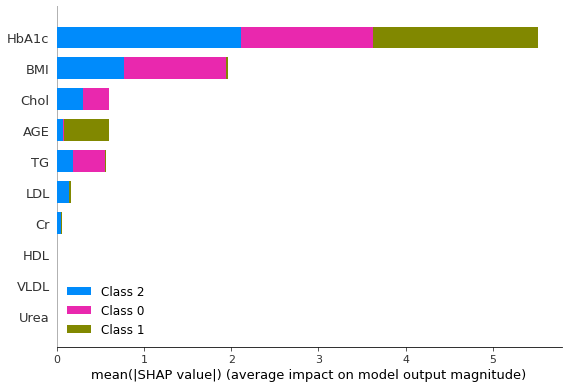

In [153]:
# Generate summary bar plot 
shap.summary_plot(shap_values, X,plot_type="bar") 